In [ ]:

import jax
jax.config.update("jax_enable_x64", True)

import jax.numpy as jnp
import numpy as np

from vehicle_model_jax import evalf, evalf_np, compute_jacobian_jax, get_default_params, N_STATES, IDX_V
from SimpleSolver import SimpleSolver
from SimpleSolverOpt import SimpleSolver as SimpleSolverOpt

In [2]:
def plot_results(X, t, filename=None):
    import matplotlib.pyplot as plt

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 4))
    
    # Speed plot
    ax1.plot(t, X[IDX_V])
    ax1.set_ylim([0.0, 2.0])
    ax1.grid()
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Speed (m/s)')
    
    # Yaw plot
    ax2.plot(t, X[IDX_V-1])
    ax2.set_ylim([-np.pi/2, np.pi/2])
    ax2.grid()
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Yaw (rad)')
    
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()

### Setup 

In [3]:
p = get_default_params()
p_tuple = tuple(p.values())

### Steady State

started running a simple solver, please wait...
Solver completed.


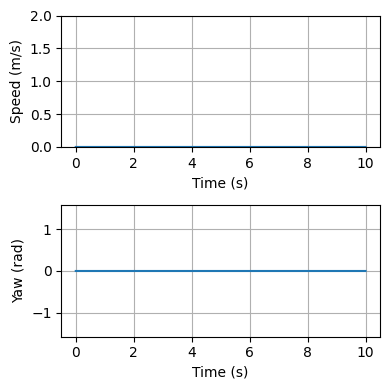

In [4]:
x0 = np.zeros(N_STATES)
x0[IDX_V] = 0.0
x0 = x0[:, None]

t_start = 0.0
t_stop = 10.0
visualize = False
w = np.array([0.000315387])
num_iter = np.ceil((t_stop - t_start) / w)

eval_u = lambda t:  np.array([0.0, 0.0])
    
[X, t] = SimpleSolverOpt(evalf_np, x0, p_tuple, eval_u, num_iter, w, visualize, gif_file_name="test_SimpleSolver_HeatBar.gif")

plot_results(X, t, filename='steady_state.pdf')

### Constant Speed (v=1)

started running a simple solver, please wait...
Solver completed.


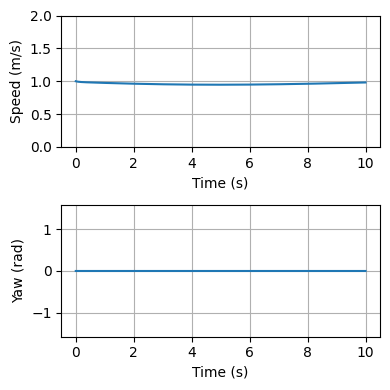

In [5]:
x0 = np.zeros(N_STATES)
x0[IDX_V] = 1.0
x0 = x0[:, None]

t_start = 0.0
t_stop = 10.0
visualize = False
w = np.array([0.000315387])
num_iter = np.ceil((t_stop - t_start) / w)

eval_u = lambda t:  np.array([1.0, 0.0])
    
[X, t] = SimpleSolverOpt(evalf_np, x0, p_tuple, eval_u, num_iter, w, visualize, gif_file_name="test_SimpleSolver_HeatBar.gif")

plot_results(X, t, filename='constant_speed.pdf')

### Accleration (v=0 -> v=1)

started running a simple solver, please wait...
Solver completed.


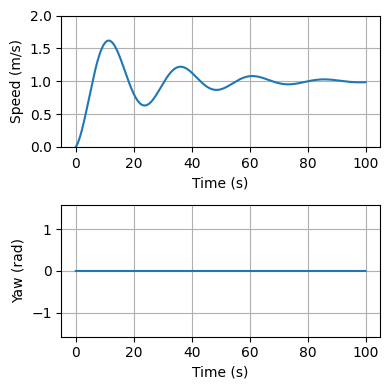

In [6]:
x0 = np.zeros(N_STATES)
x0[IDX_V] = 0.0
x0 = x0[:, None]

t_start = 0.0
t_stop = 100.0
visualize = False
w = np.array([0.000315387])
num_iter = np.ceil((t_stop - t_start) / w)

eval_u = lambda t:  np.array([1.0, 0.0])
    
[X, t] = SimpleSolverOpt(evalf_np, x0, p_tuple, eval_u, num_iter, w, visualize, gif_file_name="test_SimpleSolver_HeatBar.gif")

plot_results(X, t, filename='acceleration.pdf')

### Spinning

started running a simple solver, please wait...
Solver completed.


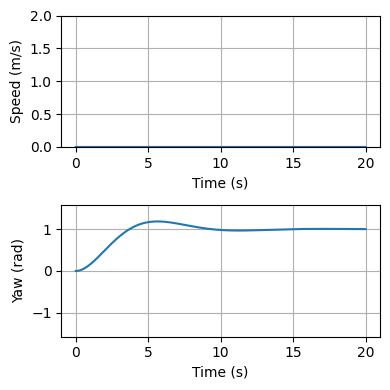

In [7]:
x0 = np.zeros(N_STATES)
x0[IDX_V] = 0.0
x0 = x0[:, None]

t_start = 0.0
t_stop = 20.0
visualize = False
w = np.array([0.000315387])
num_iter = np.ceil((t_stop - t_start) / w)

eval_u = lambda t:  np.array([0.0, 1.0])
    
[X, t] = SimpleSolverOpt(evalf_np, x0, p_tuple, eval_u, num_iter, w, visualize, gif_file_name="test_SimpleSolver_HeatBar.gif")

plot_results(X, t, filename='spinning.pdf')

### Level Turn

started running a simple solver, please wait...
Solver completed.


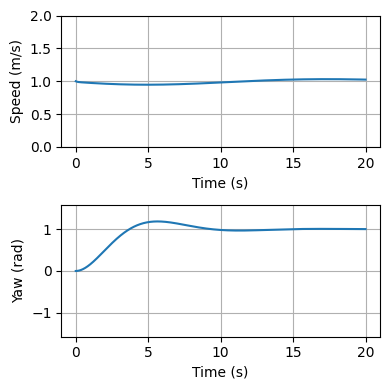

In [8]:
x0 = np.zeros(N_STATES)
x0[IDX_V] = 1.0
x0 = x0[:, None]

t_start = 0.0
t_stop = 20.0
visualize = False
w = np.array([0.000315387])
num_iter = np.ceil((t_stop - t_start) / w)

eval_u = lambda t:  np.array([1.0, 1.0])
    
[X, t] = SimpleSolverOpt(evalf_np, x0, p_tuple, eval_u, num_iter, w, visualize, gif_file_name="test_SimpleSolver_HeatBar.gif")

plot_results(X, t, filename='level_turn.pdf')